In [1]:
#This version gives Res as supply data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Assuming data is in a csv file
data = pd.read_csv("new_torch_balenced_data.csv")
#api_list=pd.read_csv("FreeFuzz_torch_API_list.csv")
# Convert API names and parameters to string if not already
data["API Name"] = data["API Name"].astype(str)
data["Parameters"] = data["Parameters"].astype(str)
data["Res"] = data["Res"].astype(str)
#api_list["API Name"]=api_list["API Name"].astype(str)
# Initialize TF-IDF vectorizer and Label Encoder
tfidf = TfidfVectorizer(max_features=1000)
le = LabelEncoder()

# Encode API names
#api_names_encoded = le.fit_transform(data["API Name"])
dictionary = le.fit_transform(data["API Name"])
api_names_encoded=le.transform(data["API Name"])
api_names_encoded = np.array(api_names_encoded).reshape(-1, 1) # reshaping to make it a 2D array

# Convert parameters into TF-IDF vectors
parameters_tfidf = tfidf.fit_transform(data["Parameters"])
res_tfidf=tfidf.fit_transform(data["Res"])
# Combine the encoded API names and TF-IDF parameter vectors
X = np.concatenate((api_names_encoded, parameters_tfidf.toarray()), axis=1)
X = np.concatenate((X, res_tfidf.toarray()), axis=1)
# Convert labels into binary format
y = data["Label"].map({'bug': 1, 'success': 0})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [2]:
print(*X_train[0])

126.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.7483270487092359 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

In [3]:
print(*y_train)

1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 

In [4]:
print(y_train_smote)

0       1
1       0
2       0
3       1
4       0
       ..
1037    0
1038    0
1039    1
1040    1
1041    0
Name: Label, Length: 1042, dtype: int64


In [9]:
import tensorflow as tf

# Model Architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=X_train_smote.shape[1]),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_recall', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

# Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

# Train the Model
history = model.fit(
    X_train_smote, y_train_smote, 
    epochs=10, 
    batch_size=32, 
    validation_data=(X_test, y_test))

Epoch 1/10
33/33 [==============================] - 1s 7ms/step - loss: 1.9742 - recall_1: 0.5893 - val_loss: 0.7070 - val_recall_1: 0.9923
Epoch 2/10
33/33 [==============================] - 0s 2ms/step - loss: 1.2491 - recall_1: 0.5585 - val_loss: 0.6720 - val_recall_1: 0.9846
Epoch 3/10
33/33 [==============================] - 0s 2ms/step - loss: 0.8881 - recall_1: 0.6334 - val_loss: 0.6720 - val_recall_1: 0.9615
Epoch 4/10
33/33 [==============================] - 0s 2ms/step - loss: 0.7843 - recall_1: 0.6296 - val_loss: 0.6727 - val_recall_1: 0.0000e+00
Epoch 5/10
33/33 [==============================] - 0s 2ms/step - loss: 0.7035 - recall_1: 0.6315 - val_loss: 0.6326 - val_recall_1: 0.7000
Epoch 6/10
33/33 [==============================] - 0s 2ms/step - loss: 0.6796 - recall_1: 0.6622 - val_loss: 0.6190 - val_recall_1: 0.9615
Epoch 7/10
33/33 [==============================] - 0s 2ms/step - loss: 0.6526 - recall_1: 0.6833 - val_loss: 0.6027 - val_recall_1: 0.9385
Epoch 8/10
33/33

In [11]:
history.history.keys()

dict_keys(['loss', 'recall_1', 'val_loss', 'val_recall_1'])

In [7]:
import matplotlib.pyplot as plt

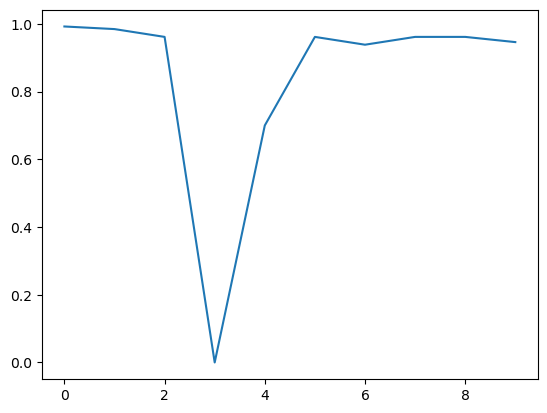

In [12]:
plt.plot(history.epoch,history.history.get('val_recall_1'))

In [19]:
# Read new data from a csv file
new_data = pd.read_csv("torch-testdata.csv")

# Ensure API names and parameters are strings
new_data["API Name"] = new_data["API Name"].astype(str)
new_data["Parameters"] = new_data["Parameters"].astype(str)

# Perform the same preprocessing steps as before
new_data_tfidf = tfidf.transform(new_data["Parameters"]).toarray()
new_api_names_encoded = le.transform(new_data["API Name"]).reshape(-1, 1)
X_new = np.concatenate((new_api_names_encoded, new_data_tfidf), axis=1)

# Predict the labels
predictions = model.predict(X_new)

# Convert the probabilities to class labels
predictions_labels = (predictions > 0.5).astype(int)

# Add the predictions to the new_data DataFrame
new_data["Label"] = ["success" if element == 0 else "bug" for element in predictions_labels]

# Write the DataFrame with the predictions to a new csv file
new_data.to_csv("new_data_with_predictions.csv", index=False)


3/3 [==============================] - 0s 804us/step
